# CS 457 - Homework Assignment 3: 
## Exploratory Data Analysis
### Maheen Anees, ma05156@st.habib.edu.pk

In [482]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [483]:
df = pd.read_csv('loan_small.csv')
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.7,9,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,Jan-16,INDIVIDUAL
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.4,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,INDIVIDUAL
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.5,10,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,Jan-16,INDIVIDUAL
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21.0,37,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,Jan-15,INDIVIDUAL
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.9,38,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Jan-16,INDIVIDUAL


In [484]:
df.dtypes

id                           int64
member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                   float64
installment                float64
grade                       object
sub_grade                   object
emp_title                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
pymnt_plan                  object
purpose                     object
title                       object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
mths_since_last_delinq     float64
mths_since_last_record     float64
open_acc            

## Checking total records

In [485]:
df.shape

(999, 47)

# Part 1: Cleaning the data

## Checking for duplicates

In [486]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
994    False
995    False
996    False
997    False
998    False
Length: 999, dtype: bool

## Removing 'months' from the column 'term'

In [487]:
df['term'] = df['term'].str.replace('months', '')
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.7,9,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,Jan-16,INDIVIDUAL
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.4,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,INDIVIDUAL
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.5,10,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,Jan-16,INDIVIDUAL
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21.0,37,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,Jan-15,INDIVIDUAL
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.9,38,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Jan-16,INDIVIDUAL


## Removing whitespaces

In [488]:
df['term']= df['term'].str.strip()

## Changing datatype to numeric

In [489]:
df['term']= df['term'].astype(int)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.7,9,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,Jan-16,INDIVIDUAL
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.4,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,INDIVIDUAL
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.5,10,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,Jan-16,INDIVIDUAL
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21.0,37,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,Jan-15,INDIVIDUAL
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.9,38,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Jan-16,INDIVIDUAL


## Removing 'years' or 'year' from emp_length

In [490]:
df['emp_length'] = df['emp_length'].str.replace('years', '')
df['emp_length'] = df['emp_length'].str.replace('year', '')
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,NaN,10+,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.7,9,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,Jan-16,INDIVIDUAL
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,< 1,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.4,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,INDIVIDUAL
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,NaN,10+,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.5,10,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,Jan-16,INDIVIDUAL
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21.0,37,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,Jan-15,INDIVIDUAL
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,University Medical Group,1,RENT,80000.0,Source Verified,Dec-11,Current,n,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.9,38,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Jan-16,INDIVIDUAL


## Filling null values, removing + and < from emp_length column and changing dtype. 
Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. So\< 1 means we will replace it by 0 and 10+ means it can be any number greater than 10 so we will replace it by 10.

In [491]:
df['emp_length'].fillna(df['emp_length'].mode()[0], inplace = True)
df['emp_length'] = df['emp_length'].str.replace('< 1', '0')
df['emp_length'] = df['emp_length'].str.replace('+', '')
df['emp_length'] = df['emp_length'].str.strip()
df['emp_length'] = df['emp_length'].astype(int)
df['emp_length'].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


0    10
1     0
2    10
3    10
4     1
Name: emp_length, dtype: int64

## Checking for columns with missing values

In [492]:
df.isnull().sum()

id                           0
member_id                    0
loan_amnt                    0
funded_amnt                  0
funded_amnt_inv              0
term                         0
int_rate                     0
installment                  0
grade                        0
sub_grade                    0
emp_title                   51
emp_length                   0
home_ownership               0
annual_inc                   0
verification_status          0
issue_d                      0
loan_status                  0
pymnt_plan                   0
purpose                      0
title                        0
zip_code                     0
addr_state                   0
dti                          0
delinq_2yrs                  0
earliest_cr_line             0
inq_last_6mths               0
mths_since_last_delinq     774
mths_since_last_record     979
open_acc                     0
pub_rec                      0
revol_bal                    0
revol_util                   0
total_ac

## Impute or replace missing values
We will fill numeric columns with the mean value and object columns using forward and backward fill

In [493]:
df['mths_since_last_delinq'].fillna(df['mths_since_last_delinq'].mean(), inplace=True) 
df['mths_since_last_record'].fillna(df['mths_since_last_record'].mean(), inplace = True)
df['last_pymnt_d'] = df['last_pymnt_d'].fillna(method='ffill')
df['emp_title'] = df['emp_title'].fillna(method='bfill')
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,Ryder,10,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,41.115556,87.0,3,0,13648,83.7,9,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,Jan-16,INDIVIDUAL
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,bike,309xx,GA,1.00,0,Apr-99,5,41.115556,87.0,3,0,1687,9.4,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,INDIVIDUAL
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,AIR RESOURCES BOARD,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,41.115556,87.0,2,0,2956,98.5,10,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,Jan-16,INDIVIDUAL
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,personel,917xx,CA,20.00,0,Feb-96,1,35.000000,87.0,10,0,5598,21.0,37,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,Jan-15,INDIVIDUAL
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,University Medical Group,1,RENT,80000.0,Source Verified,Dec-11,Current,n,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.000000,87.0,15,0,27783,53.9,38,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Jan-16,INDIVIDUAL


In [494]:
df.isnull().sum() #to check if we have filled all null values or not

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
pymnt_plan                 0
purpose                    0
title                      0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
mths_since_last_delinq     0
mths_since_last_record     0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
initial_list_status        0
out_prncp     

## Coverting column loan_status into binary attribute
Fully Paid and current is good status, while charged off, late and default is bad status

In [495]:
df['loan_status'].value_counts()

Fully Paid            729
Charged Off           176
Current                91
Late (31-120 days)      2
Default                 1
Name: loan_status, dtype: int64

In [496]:
df['loan_status'] = df['loan_status'].replace(['Fully Paid', 'Current'], 'Good')
df['loan_status'] = df['loan_status'].replace(['Charged Off', 'Late (31-120 days)', 'Default'], 'Bad')

# Part 2: Exploratory Data Analysis

## Summary Tables Using Grouping & Aggregation

In [497]:
df.groupby(['purpose', 'loan_status'])['loan_status'].count().reset_index(name='Total Records')

,purpose,loan_status,Total Records
0,car,Bad,5
1,car,Good,17
2,credit_card,Bad,32
3,credit_card,Good,220
4,debt_consolidation,Bad,100
5,debt_consolidation,Good,427
6,home_improvement,Bad,9
7,home_improvement,Good,28
8,house,Bad,2
9,house,Good,5


From the above table we can observe the total number of people who took loan for different purposes and whats their loan status. For example there are total of 427 people whose purpose of loan is debt_consolidation and have good loan status while 100 of them with the same purpose but bad loan status. A total of 22 people took loan for the purpose of car out of which 5 have bad loan status(either defualter, late of charged off). This can be observed for other categories as well 

In [498]:
df.groupby(['loan_status', 'home_ownership'])[['loan_amnt', 'annual_inc', 'int_rate']].mean()

loan_amnt    annual_inc   int_rate
loan_status home_ownership                                       
Bad         MORTGAGE        14663.068182  72068.272727  14.144318
            OWN             13450.000000  51629.714286  14.935000
            RENT            12574.173554  50371.991405  14.417934
Good        MORTGAGE        14363.556338  75117.411972  12.468979
            OWN             11652.868852  57764.622951  12.397705
            RENT            11677.105263  57286.007537  12.789284

From the table above we can observe that average amount of loan taken by people with bad loan status is from 1200s to 1400s whether they have their own home, rented or mortgaged. Similarly, for people who have fully paid or whose loan is currently running have taken around the same range of average loan amount which is from 1100s to 1400s whether they have their own home, rented or mortgaged. We can also observe that the average annual income for people with good loan status is higher than that of bad loan status which makes sense as those with higher income can pay off their debts easily. Moreover, we can also observe that the average int_rate for people with bad loan status is slightly higher than that of good loan status. 

In [499]:
df.groupby(['grade', 'home_ownership']).agg({'dti':['mean', 'min', 'max']})

dti              
                           mean    min    max
grade home_ownership                         
A     MORTGAGE        12.507407   2.21  27.99
      OWN             13.155882   0.78  24.29
      RENT            14.112308   0.93  29.85
B     MORTGAGE        14.739623   3.17  29.44
      OWN             16.397083   7.44  26.34
      RENT            14.719732   0.72  28.32
C     MORTGAGE        14.508060   1.99  25.71
      OWN             13.308889   3.16  23.92
      RENT            14.946885   0.89  26.53
D     MORTGAGE        14.959512   3.59  24.98
      OWN             15.328889   4.96  22.86
      RENT            15.609773   1.00  24.84
E     MORTGAGE        17.312500   4.29  26.82
      OWN             18.286000  12.75  21.25
      RENT            15.232326   2.65  23.21
F     MORTGAGE        12.536250   6.83  20.46
      OWN             11.135000   5.55  16.72
      RENT            14.014545   6.10  24.82
G     MORTGAGE        12.960000  12.96  12.96
      RENT            14.322500   7.02  20.88

From the above table we can observe the mean, min and max dti for each grade and home ownership. For example we can observe that for grade A, people whose home is owned has avg dti of 13.156. Similarly we can observe for other grades and home ownership categories as well.  

## Univariate Analysis


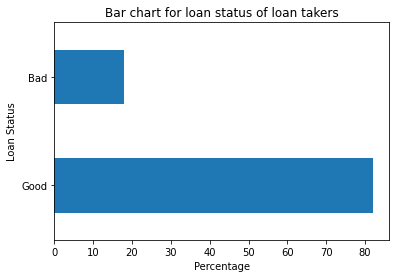

In [500]:
ax1 = df['loan_status'].value_counts()*100/len(df['loan_status'])
plot = ax1.plot(kind='barh')
plt.xlabel('Percentage')
plt.ylabel('Loan Status')
plt.title("Bar chart for loan status of loan takers")
plt.show()

From the above plot we can see that around 82% people have good loan_status which means that they have either fully paid the loan or their loans are currently running. On the other hand we can see that around 17% of the people have bad loan status which means that they are either defaulters, are late in payment or charged off which means that the debt has gone unpaid for very long.  

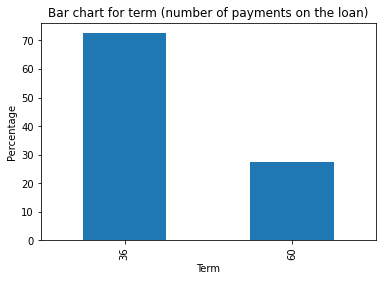

In [501]:
ax2 = df['term'].value_counts()*100/len(df['term'])
plot = ax2.plot(kind='bar')
plt.xlabel('Term')
plt.ylabel('Percentage')
plt.title("Bar chart for term (number of payments on the loan)")
plt.show()

From the above plot we can see that around 72-73% people have loan payments for 36 month term while the rest 26-27% people for 60 month term.

Text(0.5, 1.0, 'Histogram for debt to income ratio for each loan status')

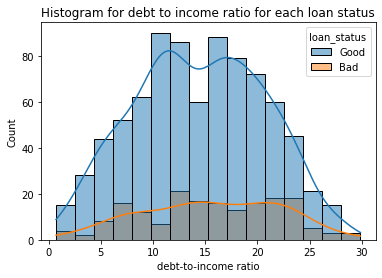

In [502]:
ax3 = sns.histplot(data=df, x='dti', kde=True, hue='loan_status')
ax3.set(xlabel='debt-to-income ratio')
plt.title("Histogram for debt to income ratio for each loan status")

From the above plot we can observe that the debt to income ratio (dti) is not skewed as the median and mean are very close to each other. The shape is close enough to be called symmetric and the mean dti is around 15% which means on average this much income of the people goes to debt payments. We can also observe that people with max dti(around 30) are the people with bad loan status which makes sense as they are unable to manage their monthly debt payments effectively.

## Bivariate Analysis

Text(0.5, 1.0, 'Scatterplot between int_rate and annual income for each loan status')

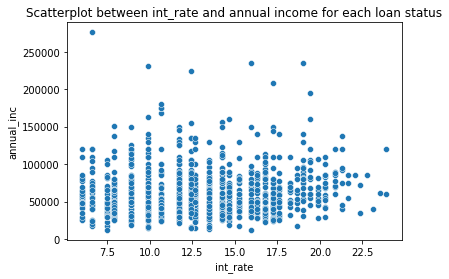

In [503]:
ax4 = sns.scatterplot(x='int_rate', y='annual_inc', data=df)
plt.title("Scatterplot between int_rate and annual income for each loan status")

From the above scatterplot we can observe that its mostly straight lines which means that there is no signifant relationship between the int_rate and annual income for each loan status.

Text(0.5, 1.0, 'Scatterplot between annual income and loan amount for each loan status')

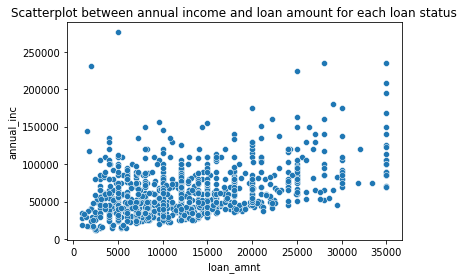

In [504]:
ax5 = sns.scatterplot(x='loan_amnt', y='annual_inc', data=df)
plt.title("Scatterplot between annual income and loan amount for each loan status")

From the above scatterplot we can observe that the relationship between annual income and loan amount is positive as the trend seems to move a bit uphill and this makes sense as people with higher annual income might tend to have more amount of loan as they can pay it off easily. However other factors other than annual income affect the amount of loan therefore the relationship though is positive its not too strong as we can observe there are some straight lines as well.    

Text(0.5, 1.0, 'Box plot between term and int_rate for each loan_status')

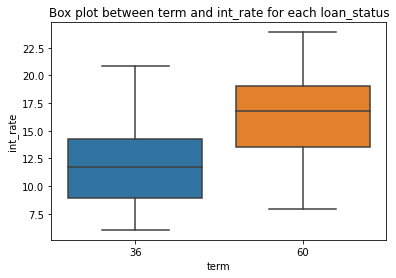

In [505]:
ax6 = sns.boxplot(x='term', y='int_rate', data=df, order=sorted(df['term'].unique()))
plt.title("Box plot between term and int_rate for each loan_status")

From the above plot we can see that int_rate increases with the term on loan as observed that int_rate is higher for 60 months term on loan and as a result we can say that chances for defualters also increases. The highest int_rate for term of 36 months is around 21 while for 60 months its 24-25.

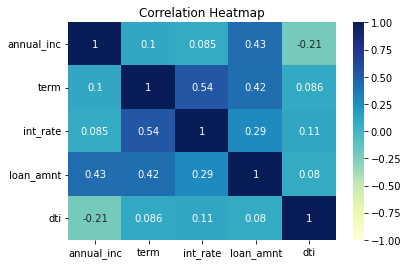

In [506]:
continuous_f = ["annual_inc", "term", "int_rate", "loan_status", "loan_amnt", "dti"]
loan_corr = df[continuous_f].corr()
sns.heatmap(loan_corr,vmin=-1.0,vmax=1.0,annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()

From the correlation map we can observe that the loan_amnt is positively correlated with the annual income and term which means that as annual income or term increases the loan amount also increases which makes sense as debts can be then payed off easily with higher income. Moreover annual income and int_rate are very weakly correlated as we also observed in the scatterplot above that most plot were staright lines. further the int_rate and term are positively correlated with the value of 0.54 which we also observed above in the box plot that as term increases the int_rate also increases. Further we can observe that debt-to-income ratio is weakly negatively correlated with annual income and have little to no affect on term, int_rate and loan_amnt.

## Multivariate Analysis

Text(0.5, 1.0, 'Box plot between term and int_rate for each loan_status')

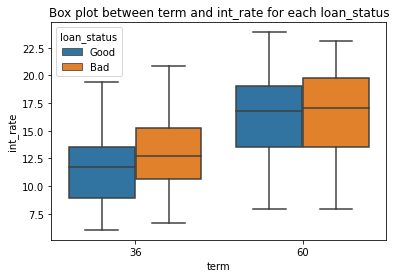

In [507]:
ax7 = sns.boxplot(x='term', y='int_rate', data=df, order=sorted(df['term'].unique()), hue='loan_status')
plt.title("Box plot between term and int_rate for each loan_status")

From the above plot we are observing three variables together: int_rate, term and loan_status. We can see that int_rate increases with the term on loan as observed that int_rate is higher for 60 months term on loan and as a result we can say that chances for defualters also increases.
Morover we can see that people with bad loan status have higher int_rate than that of good loan status for both terms which makes sense as with increased int_rate people will face difficulty in paying off the loan.